<h2>Project Libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

<h2>Data Loading</h2>

In [2]:
# Load the dataset
data = pd.read_csv('dataset/MARJANTA_DATA_CW3.csv', encoding='ISO-8859-1')

In [3]:
# Display the first few rows of the dataset
data.head()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,...,5,3,3,4,4,3,3,3,0,0.0


In [4]:
# Displaying basic info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Ref                                103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Satisfied                          103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Age Band                           103904 non-null  object 
 6   Type of Travel                     103904 non-null  object 
 7   Class                              103904 non-null  object 
 8   Flight Distance                    103904 non-null  int64  
 9   Destination                        103904 non-null  object 
 10  Continent                          103904 non-null  object 
 11  Inflight wifi service              1039

<h2>Data Preprocessing</h2>

<h3>Handling Duplicate Values</h3>

In [5]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f'Total duplicates: {duplicates}')

# Drop duplicate rows
data = data.drop_duplicates()

Total duplicates: 0


<h3>Handling Missing Values</h3>

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print('Missing values in each column:\n', missing_values)

# Fill missing values for numeric columns with the median
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

Missing values in each column:
 Ref                                    0
id                                     0
Gender                                 0
Satisfied                              0
Age                                    0
Age Band                               0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Destination                            0
Continent                              0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service         

In [7]:
# Fill missing values for categorical columns with the mode (or any other strategy)
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Verify that all missing values have been filled
print('Missing values after filling:\n', data.isnull().sum())

Missing values after filling:
 Ref                                  0
id                                   0
Gender                               0
Satisfied                            0
Age                                  0
Age Band                             0
Type of Travel                       0
Class                                0
Flight Distance                      0
Destination                          0
Continent                            0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                      

<h3>Encoding Categorical Variables</h3>

In [8]:
# Encoding for categorical variables
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Satisfied'] = data['Satisfied'].map({'Y': 1, 'N': 0})

# One-hot encoding for other categorical columns since it is also necessary
data = pd.get_dummies(data, columns=['Class', 'Age Band', 'Type of Travel'], drop_first=True)

<h2>Exploratory Data Analysis (EDA)</h2>

<h3>Visualizing Data Distribution</h3>

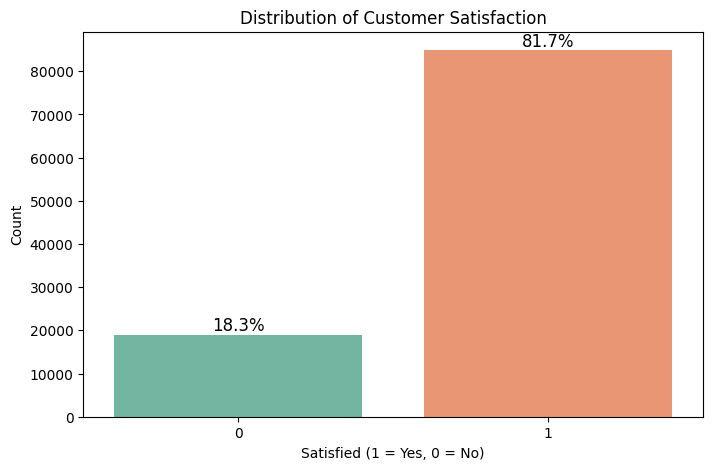

In [9]:
# Distribution of satisfaction

# Settinng the color palette for the count plot
palette = sns.color_palette("Set2")  # You can choose any palette you like

# Creating the count plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Satisfied', data=data, palette=palette)

# Customizing the plot
plt.title('Distribution of Customer Satisfaction')
plt.xlabel('Satisfied (1 = Yes, 0 = No)')
plt.ylabel('Count')

# Calculating the total count for percentages
total = len(data)

# Annotating bars with percentages
for p in ax.patches:
    percentage = f'{(p.get_height() / total) * 100:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

# Showing the resulting plot
plt.show()

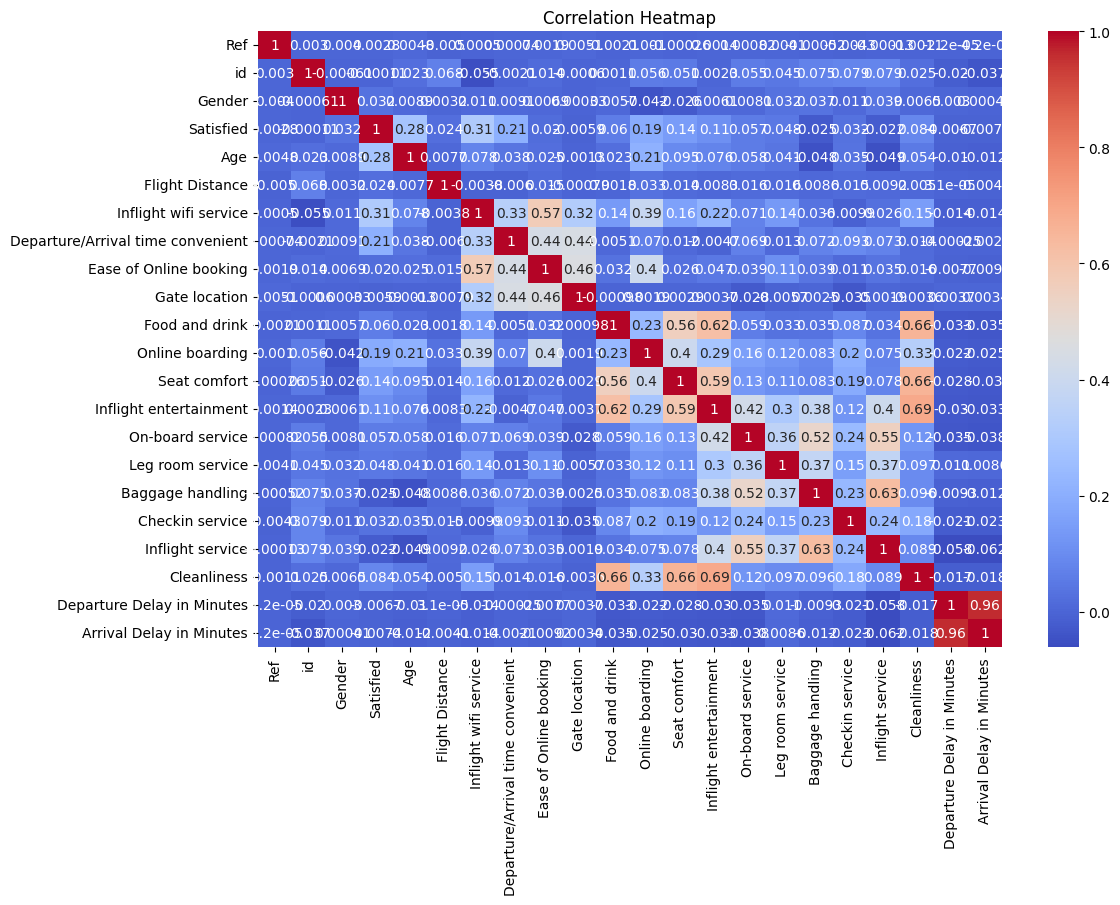

In [10]:
# Correlation Heatmap
# Selecting only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Generating the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

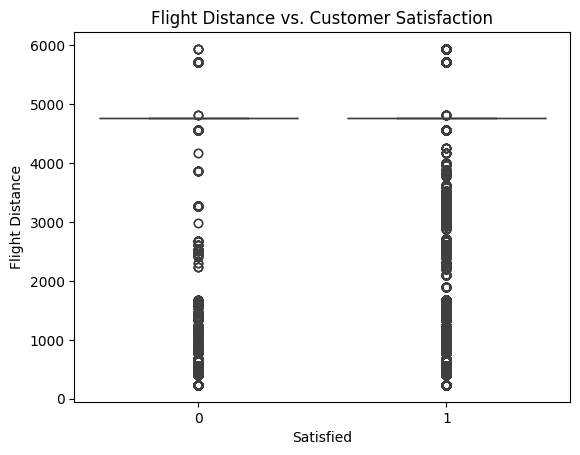

In [11]:
#Flight Distance vs. Satisfaction Box Plot
sns.boxplot(x='Satisfied', y='Flight Distance', data=data)
plt.title('Flight Distance vs. Customer Satisfaction')
plt.show()

<h2>Model Training</h2>

<h3>Splitting the Data</h3>

In [12]:
# Define features (X) and target (y)
X = data.drop(columns=['Satisfied'])
y = data['Satisfied']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

<h3>Training Models</h3>

In [13]:
# Create models
ada_model = AdaBoostClassifier()
log_model = LogisticRegression(max_iter=1000)

# Train the models
ada_model.fit(X_train, y_train)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

<h2>Model Evaluation</h2>

In [14]:
# Making predictions
y_pred_ada = ada_model.predict(X_test)
y_pred_log = log_model.predict(X_test)

# Evaluating AdaBoost model
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_ada))
print("AdaBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))

# Evaluating Logistic Regression model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

AdaBoost Accuracy: 0.9483181752562437
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      3775
           1       0.96      0.98      0.97     17006

    accuracy                           0.95     20781
   macro avg       0.92      0.90      0.91     20781
weighted avg       0.95      0.95      0.95     20781

AdaBoost Confusion Matrix:
 [[ 3095   680]
 [  394 16612]]
Logistic Regression Accuracy: 0.8668495260093354
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.40      0.52      3775
           1       0.88      0.97      0.92     17006

    accuracy                           0.87     20781
   macro avg       0.82      0.68      0.72     20781
weighted avg       0.86      0.87      0.85     20781

Logistic Regression Confusion Matrix:
 [[ 1507  2268]
 [  499 16507]]


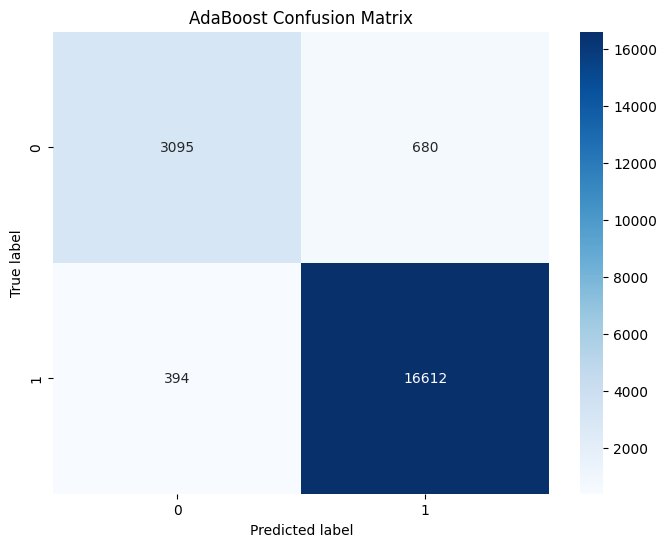

In [15]:
# Visualizing Confusion matrix for AdaBoost
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot=True, fmt="d", cmap='Blues')
plt.title('AdaBoost Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

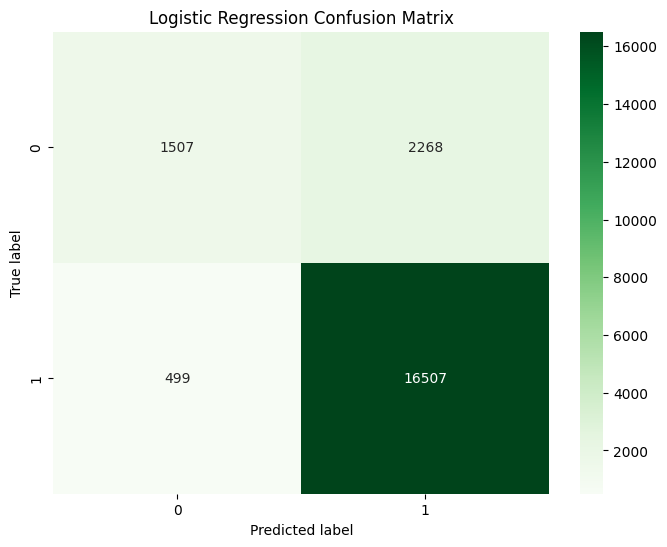

In [16]:
# Visualizing Confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap='Greens')
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

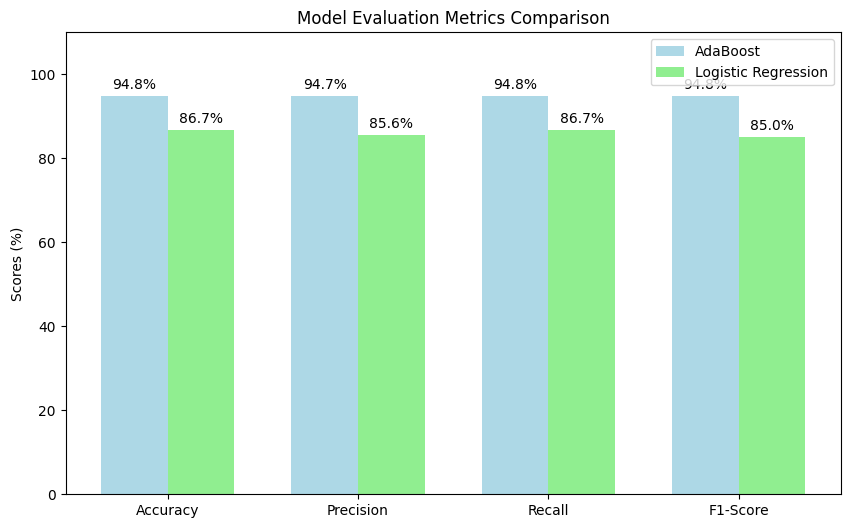

In [17]:
# Making predictions
y_pred_ada = ada_model.predict(X_test)
y_pred_log = log_model.predict(X_test)

# Evaluating AdaBoost model
ada_accuracy = accuracy_score(y_test, y_pred_ada)
ada_report = classification_report(y_test, y_pred_ada, output_dict=True)
ada_metrics = {
    'Accuracy': ada_accuracy * 100,  # Converting to percentage
    'Precision': ada_report['weighted avg']['precision'] * 100,
    'Recall': ada_report['weighted avg']['recall'] * 100,
    'F1-Score': ada_report['weighted avg']['f1-score'] * 100
}

# Evaluating Logistic Regression model
log_accuracy = accuracy_score(y_test, y_pred_log)
log_report = classification_report(y_test, y_pred_log, output_dict=True)
log_metrics = {
    'Accuracy': log_accuracy * 100,  # Converting to percentage
    'Precision': log_report['weighted avg']['precision'] * 100,
    'Recall': log_report['weighted avg']['recall'] * 100,
    'F1-Score': log_report['weighted avg']['f1-score'] * 100
}

# Plotting the metrics comparison
labels = list(ada_metrics.keys())
ada_values = list(ada_metrics.values())
log_values = list(log_metrics.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, ada_values, width, label='AdaBoost', color='lightblue')
bars2 = ax.bar(x + width/2, log_values, width, label='Logistic Regression', color='lightgreen')

# Adding text for labels, title and custom x-axis tick labels.
ax.set_ylabel('Scores (%)')
ax.set_title('Model Evaluation Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding data labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',  # Displaying as percentage
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.ylim(0, 110)  # Limiting y-axis to 0-110 for better comparison
plt.show()

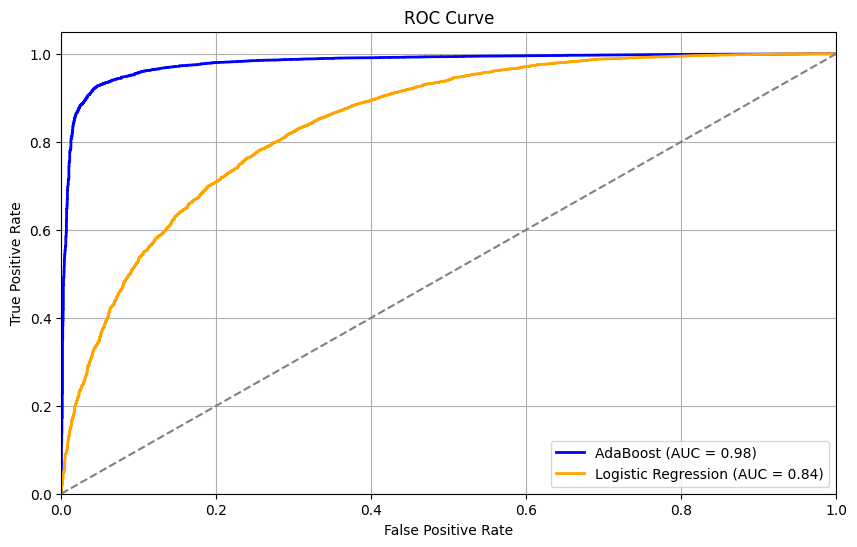

In [18]:
#Visualizing the ROC Curves

# Making predictions
y_pred_ada = ada_model.predict(X_test)
y_pred_log = log_model.predict(X_test)

# Predict probabilities
y_pred_proba_ada = ada_model.predict_proba(X_test)[:, 1]  # Probability for positive class
y_pred_proba_log = log_model.predict_proba(X_test)[:, 1]  # Probability for positive class

# Compute ROC curve for AdaBoost
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_proba_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

# Compute ROC curve for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
roc_auc_log = auc(fpr_log, tpr_log)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_ada, tpr_ada, color='blue', lw=2, label='AdaBoost (AUC = {:.2f})'.format(roc_auc_ada))
plt.plot(fpr_log, tpr_log, color='orange', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_log))

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labeling the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()